count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64
Zero sales percentage: 0.00%


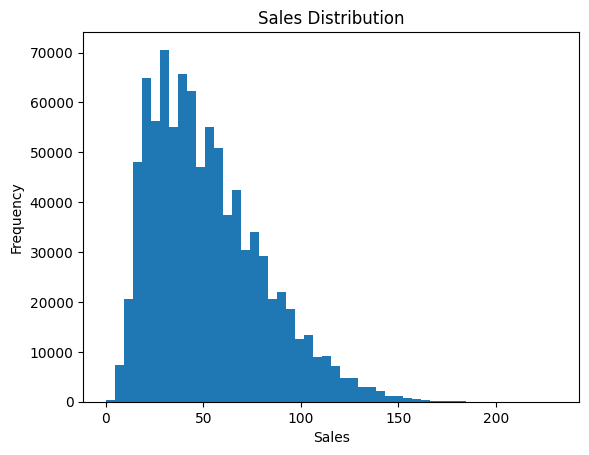

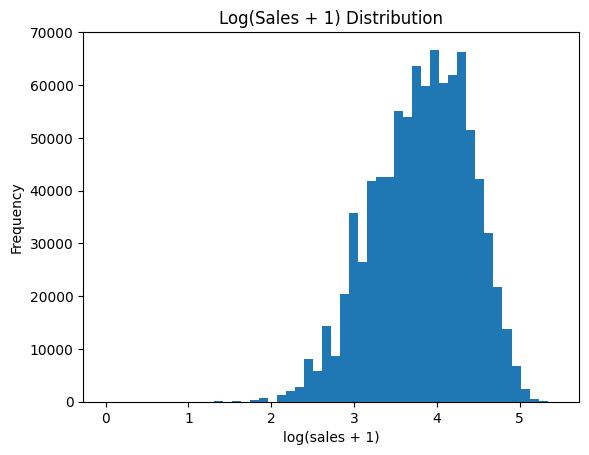

     store  item       mean       std        cv
254      6     5  13.893209  5.187877  0.373411
304      7     5  12.733844  4.731280  0.371552
204      5     5  14.086528  5.157271  0.366114
326      7    27  15.213582  5.478561  0.360110
290      6    41  16.607338  5.902563  0.355419


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
train = pd.read_csv("train.csv")
train["date"] = pd.to_datetime(train["date"])

# -------------------------
# BASIC STATS
# -------------------------
print(train["sales"].describe())

zero_sales_pct = (train["sales"] == 0).mean() * 100
print(f"Zero sales percentage: {zero_sales_pct:.2f}%")

# -------------------------
# HISTOGRAM
# -------------------------
plt.figure()
plt.hist(train["sales"], bins=50)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# -------------------------
# LOG SCALE HISTOGRAM
# -------------------------
plt.figure()
plt.hist(np.log1p(train["sales"]), bins=50)
plt.title("Log(Sales + 1) Distribution")
plt.xlabel("log(sales + 1)")
plt.ylabel("Frequency")
plt.show()

# -------------------------
# PRODUCT LEVEL VARIABILITY
# -------------------------
product_stats = (
    train.groupby(["store", "item"])["sales"]
    .agg(["mean", "std"])
    .reset_index()
)

product_stats["cv"] = product_stats["std"] / (product_stats["mean"] + 1e-6)

print(product_stats.sort_values("cv", ascending=False).head())


